In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
import matplotlib.pyplot as plt

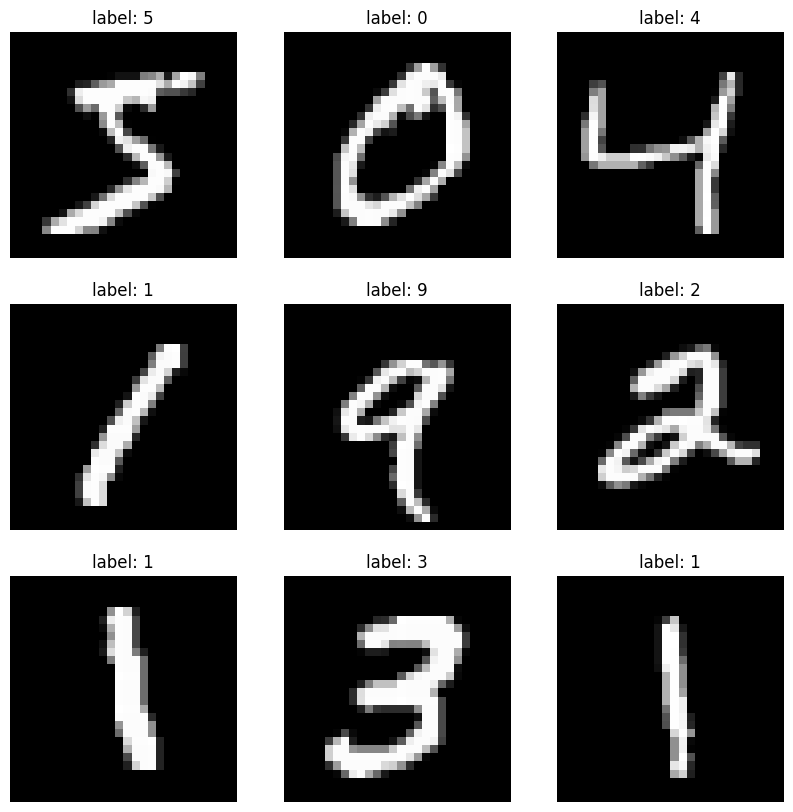

In [10]:
def show_images(images, labels, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(f'label: {labels[i]}')
    plt.show()

show_images(x_train, y_train, 9)

In [33]:
#preprossesing of the data
import numpy as np
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0 # -1 automatically checks the no of images in the dataset and then we are converting to 1D from 2D
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [34]:
model = models.Sequential([
    # hidden layer 1
    layers.Dense(128, activation='relu'),
    # hidden layer 2
    layers.Dense(64, activation='relu'),
    # output layer
    layers.Dense(10, activation='softmax')
])

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5340 - loss: 1.5677
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8603 - loss: 0.4915
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8940 - loss: 0.3726
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9033 - loss: 0.3370
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9095 - loss: 0.3140
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9184 - loss: 0.2838
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9226 - loss: 0.2696
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9289 - loss: 0.2496
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9310 - loss: 0.2379
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9391 - loss: 0.2125


In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.2384
Test accuracy: 0.9394000172615051


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


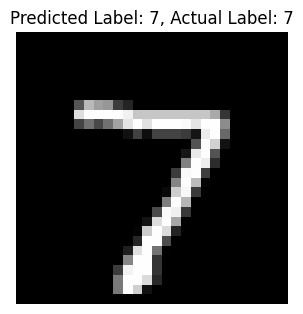

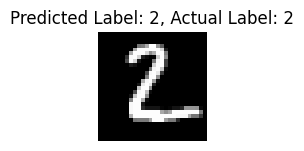

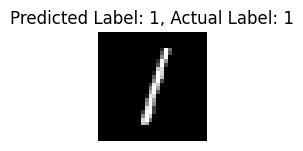

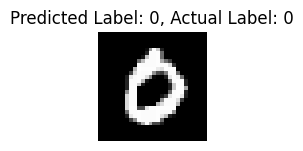

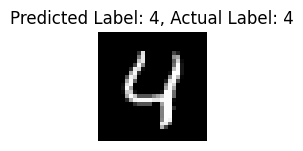

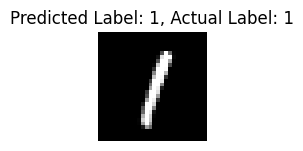

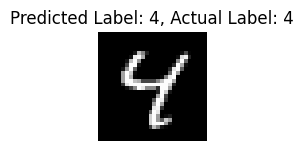

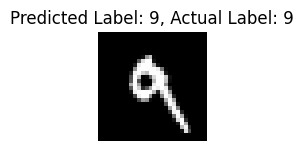

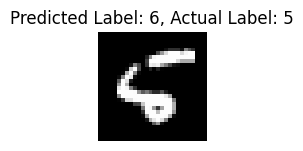

In [41]:
predictions = model.predict(x_test[:9]) # predict 9 images
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title(f"Predicted Label: {predicted_labels[i]}, Actual Label: {y_test[i]}")
  plt.axis("off")
  plt.show()